# Data Visualization
This notebook is a walkthrough of data acquired from the Java code in the stringhashing folder of this repository. Markdown cells and Python comments will be placed throughout as nessiary for explination.

In [59]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# Read the CSV data into a Pandas dataframe
collisionData = pd.read_csv('./collisions.csv')
timeData = pd.read_csv('./averagetime.csv')

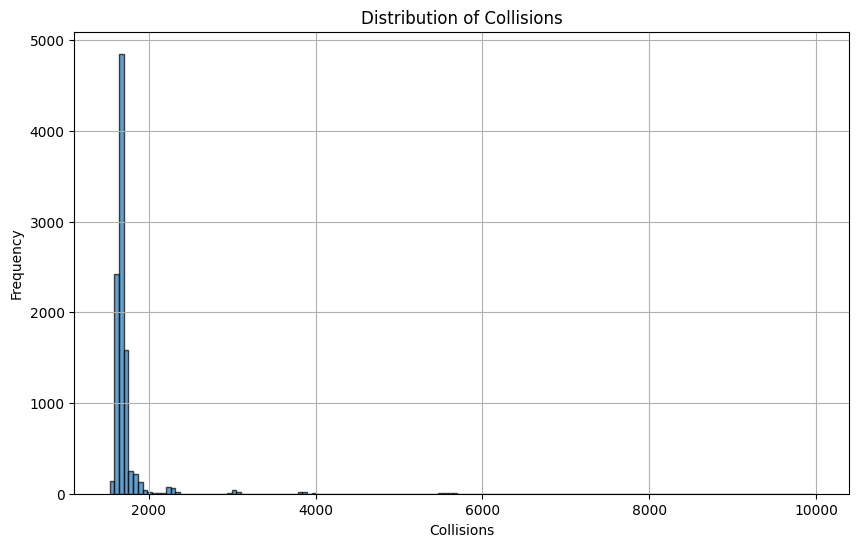

Minimum:  1533


KeyError: 'Collisisons'

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(collisionData['Collisions'], bins=150, alpha=0.7, edgecolor='black')

plt.xlabel('Collisions')
plt.ylabel('Frequency')
plt.title('Distribution of Collisions')

plt.grid(True)
plt.show()
print("Minimum: ", collisionData['Collisions'].min())
print("Maximum: ", collisionData['Collisions'].max())
print("Median: ", collisionData['Collisions'].median())

In [63]:
# Dataframe partitioning for analysis
evenCollisions = collisionData[collisionData.Index %2==0]
oddCollisions = collisionData[collisionData.Index %2==1]
primeCollisions = collisionData[collisionData.Index.apply(lambda x: x > 1 and all(x % i != 0 for i in range(2, int(x**0.5) + 1)))]
compositeCollisions = collisionData[~collisionData.Index.isin(primeCollisions.Index)]

In [64]:
# Average collisions for partitions
print("Composite indices")
print("Mean: ", compositeCollisions.Collisions.mean(axis=0))
print("Median: ", compositeCollisions.Collisions.median(axis=0),"\n")

print("Prime indices")
print("Mean: ", primeCollisions.Collisions.mean(axis=0))
print("Median: ", primeCollisions.Collisions.median(axis=0),"\n")

print("Even indices")
print("Mean: ", evenCollisions.Collisions.mean(axis=0))
print("Median: ", evenCollisions.Collisions.median(axis=0),"\n")

print("Odd indices")
print("Mean: ", oddCollisions.Collisions.mean(axis=0))
print("Median: ", oddCollisions.Collisions.median(axis=0),"\n")

Composite indices
Mean:  1735.0329494926461
Median:  1672.0 

Prime indices
Mean:  1682.7908868999186
Median:  1667.0 

Even indices
Mean:  1781.6848
Median:  1677.0 

Odd indices
Mean:  1675.54
Median:  1667.0 



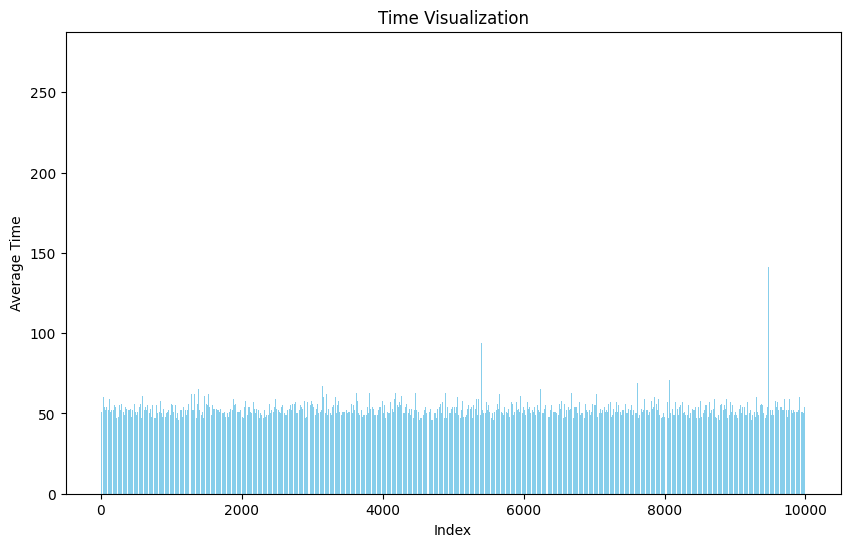

In [65]:
# Time chart
plt.figure(figsize=(10, 6))
plt.bar(timeData['Index'], timeData['Time'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Average Time')
plt.title('Time Visualization');

As you can see Java's internal optimization allows for the time to remain relatively constant as the values get larger and larger. That being said, there are clearly some outliers and in the next cell we will see how the time is distributed.

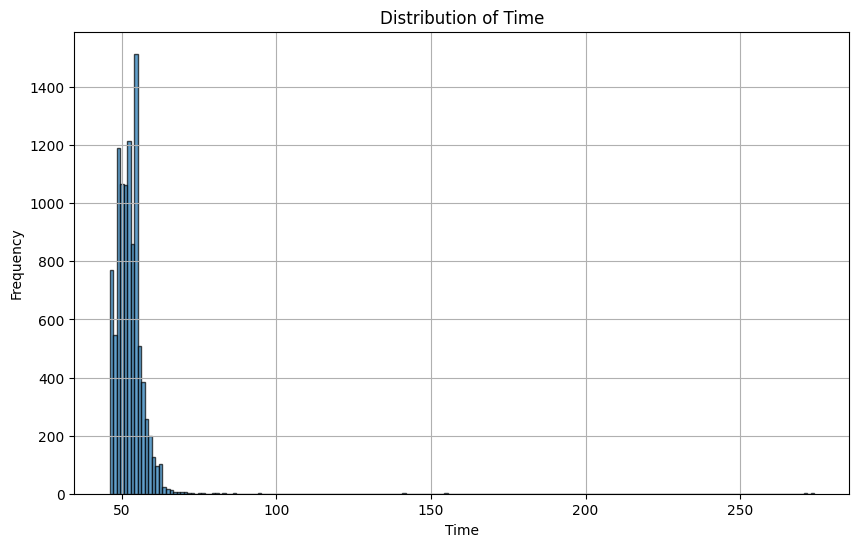

Minimum:  46
Maximum:  274
Median:  52.0


In [66]:
plt.figure(figsize=(10, 6))
plt.hist(timeData['Time'], bins=200, alpha=0.7, edgecolor='black')

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')

plt.grid(True)
plt.show()
print("Minimum: ", timeData['Time'].min())
print("Maximum: ", timeData['Time'].max())
print("Median: ", timeData['Time'].median())

The optimization becomes even more aparent here. Almost all of the operations happen within a relatively small margin of each other except for a few outliers. The difference between the minimum and maximum values along with the median value shows just how tightly distributed these times are. Keep in mind that each time entry is the average time for that hasinging number across the 10,000 most common English words, so we are getting a large sample for each data point. It is clear that we have a large amount of numbers to choose from that will meet the speed requirement of the hashing algorithm.

In [67]:
# Max and min time
# Time of 31
# Sort by averageTime and then display to see distribution

In [68]:
# Maybe a time v collisions graph